In [1]:
import pandas as pd

In [2]:
from sklearn.datasets import load_wine

In [3]:
help(load_wine)

Help on function load_wine in module sklearn.datasets._base:

load_wine(*, return_X_y=False, as_frame=False)
    Load and return the wine dataset (classification).
    
    .. versionadded:: 0.18
    
    The wine dataset is a classic and very easy multi-class classification
    dataset.
    
    =================   ==============
    Classes                          3
    Samples per class        [59,71,48]
    Samples total                  178
    Dimensionality                  13
    Features            real, positive
    =================   ==============
    
    Read more in the :ref:`User Guide <wine_dataset>`.
    
    Parameters
    ----------
    return_X_y : bool, default=False.
        If True, returns ``(data, target)`` instead of a Bunch object.
        See below for more information about the `data` and `target` object.
    
    as_frame : bool, default=False
        If True, the data is a pandas DataFrame including columns with
        appropriate dtypes (numeric). Th

In [3]:
data = load_wine(as_frame=True)

In [4]:
df = data.data

In [5]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [6]:
data.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [7]:
data.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [11]:
# scale features

from sklearn.preprocessing import StandardScaler
features = data.feature_names
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = data.target
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [12]:
x.shape, y.shape

((178, 13), (178,))

In [13]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
components = pca.fit_transform(x)
components_df = pd.DataFrame(data=components, columns=['component 1', 'component 2'])

In [14]:
components_df.count()

component 1    178
component 2    178
dtype: int64

In [15]:
final_df = pd.concat([components_df, data.target], axis=1)


In [16]:
final_df

,component 1,component 2,target
0,3.316751,-1.443463,0
1,2.209465,0.333393,0
2,2.516740,-1.031151,0
3,3.757066,-2.756372,0
4,1.008908,-0.869831,0
...,...,...,...
173,-3.370524,-2.216289,2
174,-2.601956,-1.757229,2
175,-2.677839,-2.760899,2
176,-2.387017,-2.297347,2


In [17]:
import matplotlib.pyplot as plt

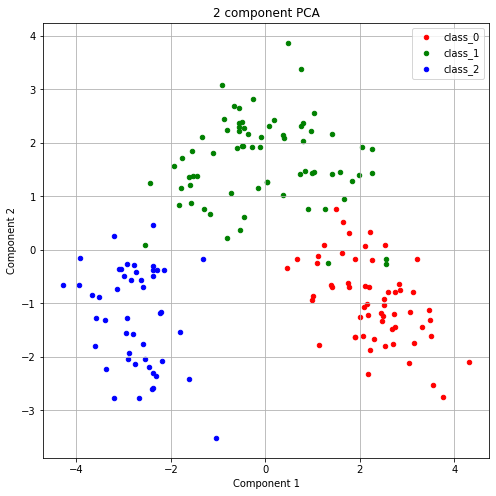

In [24]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_title('2 component PCA')
targets = data.target_names
colors = ['r', 'g', 'b']
for target, color in zip([0, 1, 2], colors):
    indicesToKeep = final_df['target'] == target
    ax.scatter(final_df.loc[indicesToKeep, 'component 1'],
               final_df.loc[indicesToKeep, 'component 2'],
               c=color,
               s=20)
ax.legend(targets)
ax.grid()